<a href="https://colab.research.google.com/github/jwross24/lambda-intro/blob/master/[Jonathan_Ross]_LSDS_Intro_Assignment_2_Intro_to_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Copy the notebook to your google account.

## 2) Import the pandas library and alias it as "pd".

In [0]:
##### Your Code Here #####
import pandas as pd

## 3) Read in the CSV dataset that is found at the following URL:
[DATASET HERE](https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv)


In [0]:
##### Your Code Here #####
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv')

## 4) Print out the shape as well as the first 5 rows of the dataframe.

In [23]:
##### Your Code Here #####
df.head()

,alpha,beta,gamma,delta,epsilon,zeta,eta
0,2,48,12,240,3.0,Yes,AZ
1,3,46,18,230,5.0,NaN,VT
2,4,44,24,220,7.0,No,PA
3,5,42,30,210,9.0,Yes,OK
4,6,44,36,220,11.0,Yes,MD


## 5) Print out the datatypes of the dataframe columns (dataset features).

In [24]:
##### Your Code Here #####
df.dtypes

alpha        int64
beta         int64
gamma        int64
delta        int64
epsilon    float64
zeta        object
eta         object
dtype: object

## 6) Print out the summary statistics of the numeric values of your dataset i.e. min, max, mean, standard deviation, etc.

In [25]:
##### Your Code Here #####
df.describe()

,alpha,beta,gamma,delta,epsilon
count,165.000000,165.000000,165.000000,165.000000,141.000000
mean,46.169697,17.921212,277.018182,89.606061,164.794326
std,24.371521,17.769180,146.229125,88.845900,96.430843
min,2.000000,-11.000000,12.000000,-55.000000,3.000000
25%,28.000000,7.000000,168.000000,35.000000,83.000000
50%,44.000000,15.000000,264.000000,75.000000,163.000000
75%,65.000000,32.000000,390.000000,160.000000,247.000000
max,85.000000,50.000000,510.000000,250.000000,331.000000


## 6) Clean all NaN values from the dataset.

Feel free to add code cells as needed.

In [26]:
##### Your Code Here #####
df.head(10)

,alpha,beta,gamma,delta,epsilon,zeta,eta
0,2,48,12,240,3.0,Yes,AZ
1,3,46,18,230,5.0,NaN,VT
2,4,44,24,220,7.0,No,PA
3,5,42,30,210,9.0,Yes,OK
4,6,44,36,220,11.0,Yes,MD
5,7,46,42,230,13.0,No,OH
6,8,48,48,240,15.0,Yes,AL
7,9,50,54,250,17.0,No,AR
8,5,40,30,200,19.0,Yes,GA
9,5,38,30,190,NaN,No,DE


In [27]:
df.isnull().sum()

alpha       0
beta        0
gamma       0
delta       0
epsilon    24
zeta       19
eta         0
dtype: int64

In [28]:
# Here we see that only the epsilon and zeta columns have NaN values
# It looks like there's a pattern in the epsilon column, so let's check it out.
df.epsilon.head(10)

0     3.0
1     5.0
2     7.0
3     9.0
4    11.0
5    13.0
6    15.0
7    17.0
8    19.0
9     NaN
Name: epsilon, dtype: float64

In [29]:
# Replace NaN values in epsilon according to the pattern
full_pattern = [float(i*2 + 3) for i in range(len(df['epsilon']))]
s = pd.Series(full_pattern)
df['epsilon'] = df['epsilon'].fillna(s)
df['epsilon'].isnull().sum()

0

In [30]:
df['zeta'] = df['zeta'].fillna(method='ffill')
df['zeta'].isnull().sum()

0

## 6.1) Describe how you addressed the NaN values and give an explanation justifying your decision.

In [0]:
##### Your Code Here #####
# For the epsilon column, the values seemed to follow a pattern. In order to use
# the fillna() function, we input the values to replace the NaN using a series.
# In order to define the series, I used the pandas.Series function. Then fillna
# specifies the index for each item in the series to replace the NaN. That way,
# the pattern is sustained.

# Looking into the documentation, I also found a function called interpolate()
# that could probably perform the same job. However, I limited myself to only
# using the functionality in fillna().

# For the zeta column, it seems like there is a good mix of 'Yes' and 'No'
# before each NaN value, so the 'ffill' method in fillna() will do a good job
# and not add too much bias to the data.

## 7) Create scatter plots using Matplotlib. Can you find any interesting relationships in the data? Be sure to label your axis and to give your graphs a title.

Screenshot cool graphs that you create and share them with the slack channel. 

Don't forget to import matplotlib before trying to use it.

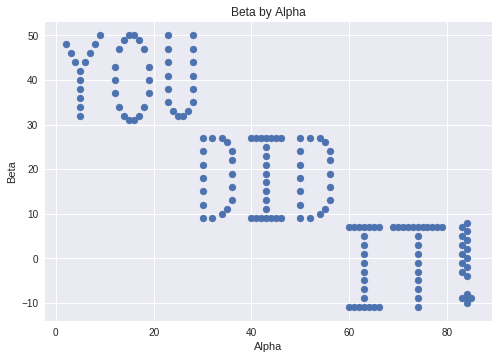

In [33]:
##### Your Code Here #####
import matplotlib.pyplot as plt

plt.scatter(df['alpha'], df['beta'])
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Beta by Alpha')
plt.show()

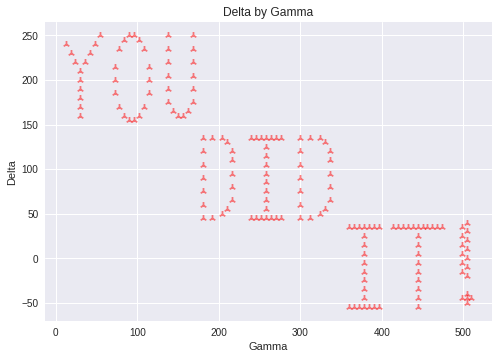

In [38]:
plt.scatter(df['gamma'], df['delta'], c='r', alpha=0.5, linewidths=2, 
            marker='2', edgecolors='k')
plt.xlabel('Gamma')
plt.ylabel('Delta')
plt.title('Delta by Gamma')
plt.show()

## 8) STRETCH GOAL (Extra Credit)

Machine Learning algorithms don't do well with categorical values that are represented by strings. In order to have this dataset completely cleaned we need to transform the categorical variables that are represented as strings into numeric categorical variables

- **Turn all categorical features (columns) into numeric features**

Hints:

[Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[Pandas Docs - Working with Categorical Data](https://pandas.pydata.org/pandas-docs/stable/categorical.html)

[Guide to Encoding Categorical Variables in Python](http://pbpython.com/categorical-encoding.html)

In [39]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,zeta,eta
0,Yes,AZ
1,Yes,VT
2,No,PA
3,Yes,OK
4,Yes,MD


In [40]:
pd.get_dummies(obj_df, columns=['zeta', 'eta']).head()

,zeta_No,zeta_Yes,eta_AK,eta_AL,eta_AR,eta_AZ,eta_CA,eta_CO,eta_CT,eta_DC,...,eta_SD,eta_TN,eta_TX,eta_UT,eta_VA,eta_VT,eta_WA,eta_WI,eta_WV,eta_WY
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
